In [1]:
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

sns.set_style("dark")

In [2]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip = cases_by_zip.reset_index()

#needed to change type of zip tp string to drop the decimal and then to an object to join on later
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(str)
cases_by_zip['ZIP'] = cases_by_zip['ZIP'].str.split('.').str[0]
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(object)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Zip,Cases,ZIP
0,37013.0,13354,37013
18,37211.0,10233,37211
16,37209.0,5072,37209
14,37207.0,4729,37207
6,37115.0,4574,37115


In [3]:
top_5_z=cases_zip_ord.head(5)

In [4]:
top_5_b=cases_zip_ord.tail(5)
top_5_b

,Zip,Cases,ZIP
26,37219.0,270,37219
1,37027.0,231,37027
20,37213.0,65,37213
2,37069.0,16,37069
30,37238.0,3,37238


In [5]:
case_count_top=case_count_df[case_count_df['Zip'].isin(top_5_z.Zip)]
case_count_top.head(5)

,Specimen Collection Date,Zip,Cases,date
2,3/11/2020,37013.0,1,2020-03-11
10,3/12/2020,37013.0,1,2020-03-12
12,3/12/2020,37211.0,1,2020-03-12
18,3/13/2020,37013.0,1,2020-03-13
24,3/13/2020,37211.0,1,2020-03-13


In [6]:
case_count_bot=case_count_df[case_count_df['Zip'].isin(top_5_b.Zip)]
case_count_bot.head(5)

,Specimen Collection Date,Zip,Cases,date
28,3/13/2020,37219.0,1,2020-03-13
33,3/14/2020,37027.0,1,2020-03-14
52,3/16/2020,37027.0,1,2020-03-16
81,3/17/2020,37219.0,1,2020-03-17
99,3/18/2020,37219.0,1,2020-03-18


In [7]:
pop_data = pd.read_excel("data/hisp.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
pop_data = pop_data[pop_data.columns.drop(list(pop_data.filter(regex='Error')))]
pop_data.columns = pop_data.columns.droplevel(1)
pop_data = pop_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)
pop_data['zipcode'] = pop_data.loc[:, ['zipcode']].astype(object)

pop_data.head(5)

Unnamed: 0_level_0,zipcode,Total:,Not Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,...,Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, and three or more races"
0,37010,4966,4803,4502,245,2,27,0,0,27,...,163,90,0,0,0,20,0,53,0,53
1,37012,2185,2134,2050,73,0,3,0,0,8,...,51,47,0,0,0,0,0,4,0,4
2,37013,97939,81131,40080,33280,95,4250,0,374,3052,...,16808,13242,446,48,0,0,2464,608,357,251
3,37014,2835,2783,2682,18,0,47,0,0,36,...,52,40,0,0,0,0,0,12,12,0
4,37015,17665,16768,15842,304,147,107,0,5,363,...,897,635,0,2,0,0,221,39,37,2


In [8]:
gend_data = pd.read_excel("data/gender_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
gend_data = gend_data[gend_data.columns.drop(list(gend_data.filter(regex='Error')))]
gend_data.columns = gend_data.columns.droplevel(1)
gend_data = gend_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [9]:
ge_data = pd.read_excel("data/gender_ed.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
ge_data = ge_data[ge_data.columns.drop(list(ge_data.filter(regex='Error')))]
ge_data.columns = ge_data.columns.droplevel(1)
ge_data = ge_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [10]:
income_data = pd.read_excel("data/income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
income_data.columns = income_data.columns.droplevel(1)
income_data = income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [11]:
x=cases_by_zip.merge(income_data, left_on='ZIP', right_on='zipcode', how='left', indicator=True)
y=x.merge(pop_data, left_on='ZIP', right_on='zipcode', how='left', indicator='True')
y=y.drop(columns=['Not Hispanic or Latino:',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races',
       'Hispanic or Latino:', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races', 'True', '_merge'])
y.head(5)

,Zip,Cases,ZIP,zipcode_x,Total:_x,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999",...,"$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",zipcode_y,Total:_y
0,37013.0,13354,37013,37013,35597.0,1424.0,1023.0,1197.0,1751.0,1647.0,...,1748.0,3956.0,4510.0,5507.0,3547.0,1703.0,1212.0,1002.0,37013,97939.0
1,37027.0,231,37027,37027,19950.0,460.0,173.0,246.0,250.0,254.0,...,472.0,597.0,1235.0,1861.0,2167.0,1688.0,2837.0,6606.0,37027,56117.0
2,37069.0,16,37069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37069,20467.0
3,37072.0,2984,37072,37072,12533.0,534.0,412.0,456.0,674.0,687.0,...,544.0,1095.0,1311.0,2186.0,1120.0,784.0,652.0,486.0,37072,31492.0
4,37076.0,4279,37076,37076,17389.0,698.0,405.0,626.0,496.0,946.0,...,918.0,1445.0,2146.0,2648.0,1709.0,1167.0,1193.0,678.0,37076,40161.0


In [12]:
y['pov_pop']=y.iloc[:,5:10].sum(axis=1)
y['pov_perc']=y['pov_pop']/y['Total:_y']*100
y

,Zip,Cases,ZIP,zipcode_x,Total:_x,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999",...,"$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",zipcode_y,Total:_y,pov_pop,pov_perc
0,37013.0,13354,37013,37013,35597.0,1424.0,1023.0,1197.0,1751.0,1647.0,...,4510.0,5507.0,3547.0,1703.0,1212.0,1002.0,37013,97939.0,7042.0,7.190190
1,37027.0,231,37027,37027,19950.0,460.0,173.0,246.0,250.0,254.0,...,1235.0,1861.0,2167.0,1688.0,2837.0,6606.0,37027,56117.0,1383.0,2.464494
2,37069.0,16,37069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37069,20467.0,0.0,0.000000
3,37072.0,2984,37072,37072,12533.0,534.0,412.0,456.0,674.0,687.0,...,1311.0,2186.0,1120.0,784.0,652.0,486.0,37072,31492.0,2763.0,8.773657
4,37076.0,4279,37076,37076,17389.0,698.0,405.0,626.0,496.0,946.0,...,2146.0,2648.0,1709.0,1167.0,1193.0,678.0,37076,40161.0,3171.0,7.895720
5,37080.0,574,37080,37080,3012.0,112.0,119.0,254.0,131.0,188.0,...,262.0,384.0,263.0,161.0,161.0,188.0,37080,7394.0,804.0,10.873681
6,37115.0,4574,37115,37115,16510.0,813.0,948.0,941.0,1147.0,1209.0,...,1848.0,1966.0,1039.0,314.0,329.0,280.0,37115,40343.0,5058.0,12.537491
7,37138.0,2359,37138,37138,9264.0,331.0,242.0,218.0,348.0,411.0,...,1155.0,1535.0,962.0,678.0,687.0,414.0,37138,23784.0,1550.0,6.516986
8,37189.0,479,37189,37189,1509.0,52.0,1.0,85.0,51.0,27.0,...,185.0,281.0,171.0,144.0,99.0,78.0,37189,4016.0,216.0,5.378486
9,37201.0,299,37201,37201,526.0,62.0,0.0,0.0,0.0,18.0,...,90.0,104.0,18.0,0.0,89.0,67.0,37201,1619.0,80.0,4.941322


In [13]:
y_pov=y[['Cases','ZIP','pov_pop', 'pov_perc','Zip']]
y_pov_ord=y_pov.sort_values(by=['pov_perc'], ascending=False)
y_pov_ord

,Cases,ZIP,pov_pop,pov_perc,Zip
29,310,37228,475.0,29.411765,37228.0
15,2428,37208,3229.0,17.927933,37208.0
17,2100,37210,3017.0,17.491883,37210.0
10,3346,37203,2617.0,17.341462,37203.0
14,4729,37207,5127.0,12.965304,37207.0
6,4574,37115,5058.0,12.537491,37115.0
13,3112,37206,3215.0,12.186339,37206.0
25,1785,37218,1747.0,11.112525,37218.0
16,5072,37209,4237.0,10.958514,37209.0
5,574,37080,804.0,10.873681,37080.0


# run this next cell twice. would love a coding solution to not having to say this

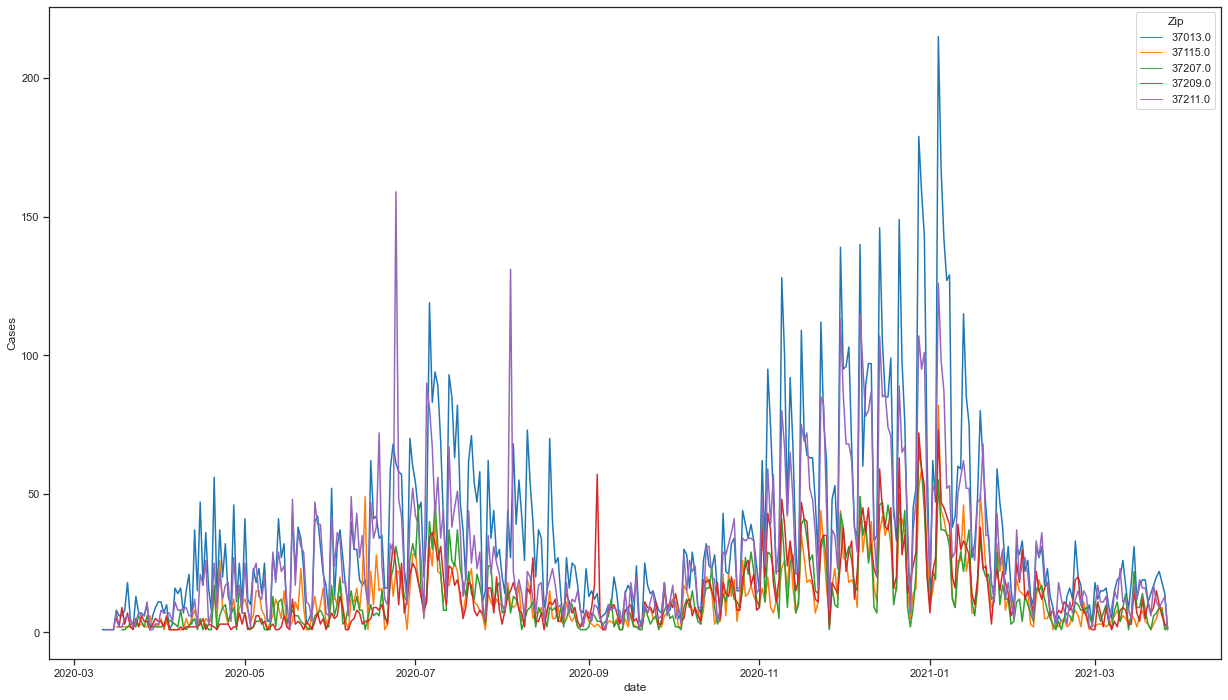

In [40]:
sns.lineplot(data=case_count_top, x="date", y="Cases", hue='Zip', palette='tab10', linewidth=1.5)
mpl.rcParams['figure.figsize'] = 21,12
#sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})##trying to figure out more settings, not currently working

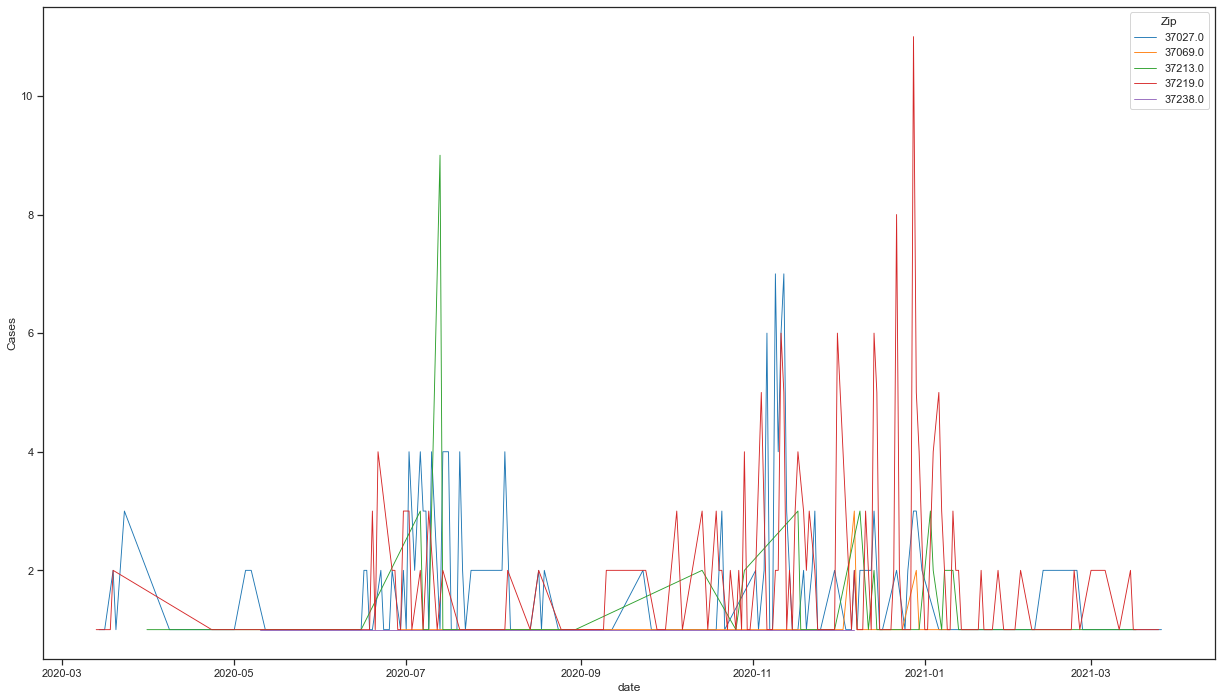

In [15]:
sns.set_palette("tab10")
sns.set(style="ticks", rc={"lines.linewidth": 0.9})
g=sns.lineplot(data=case_count_bot, x="date", y="Cases", hue='Zip', palette='tab10')
mpl.rcParams['figure.figsize'] = 20,8.27

In [16]:
#GB=case_count_df.groupby([(case_count_df.date.year),(case_count_df.date.month)]).sum()

month= case_count_df.groupby([case_count_df['date'].dt.year, 
                                case_count_df['date'].dt.month,
                                case_count_df['Zip']]).agg({'Cases':sum})
month

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

In [17]:
month_data = pd.DataFrame(data=month)
month_data

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

# these next couple charts are mostly tests/"maybe later with more work" kinda options

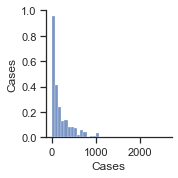

In [18]:
sns.pairplot(month_data)  

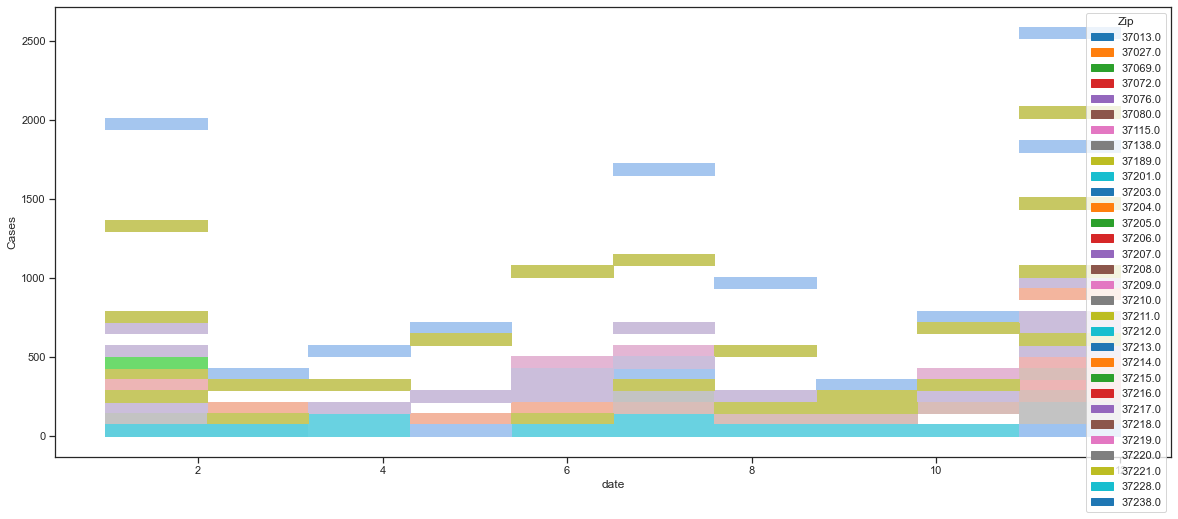

In [19]:
sns.histplot(data=month_data, x="date", y="Cases", hue='Zip', palette='tab10', linewidth=1.5)
mpl.rcParams['figure.figsize'] = 21,12

C:\Users\there\anaconda3\envs\geospatial\lib\site-packages\seaborn\distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'multiple'
  cset = contour_func(


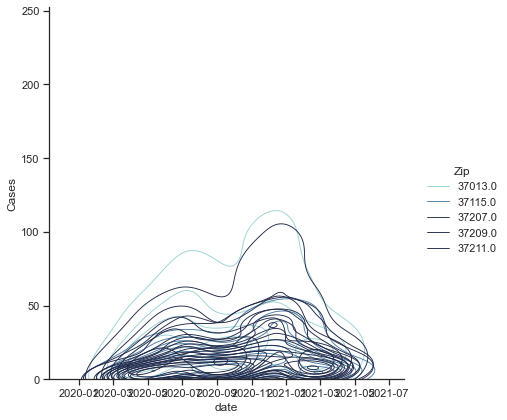

In [20]:
sns.displot(
    data=case_count_top,
    x="date", y="Cases", hue="Zip",
    kind="kde", height=6,
    multiple="countour", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75")

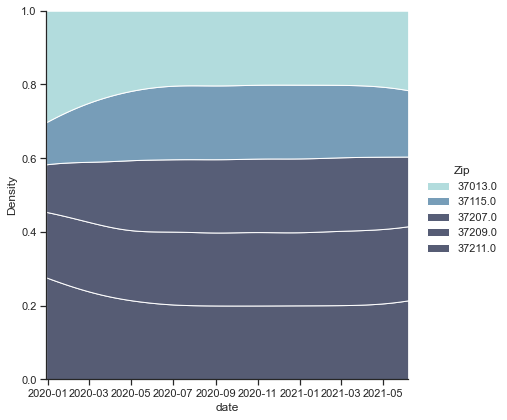

In [21]:
sns.displot(
    data=case_count_top,
    x="date", hue="Zip",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75")

<AxesSubplot:xlabel='date', ylabel='Cases'>

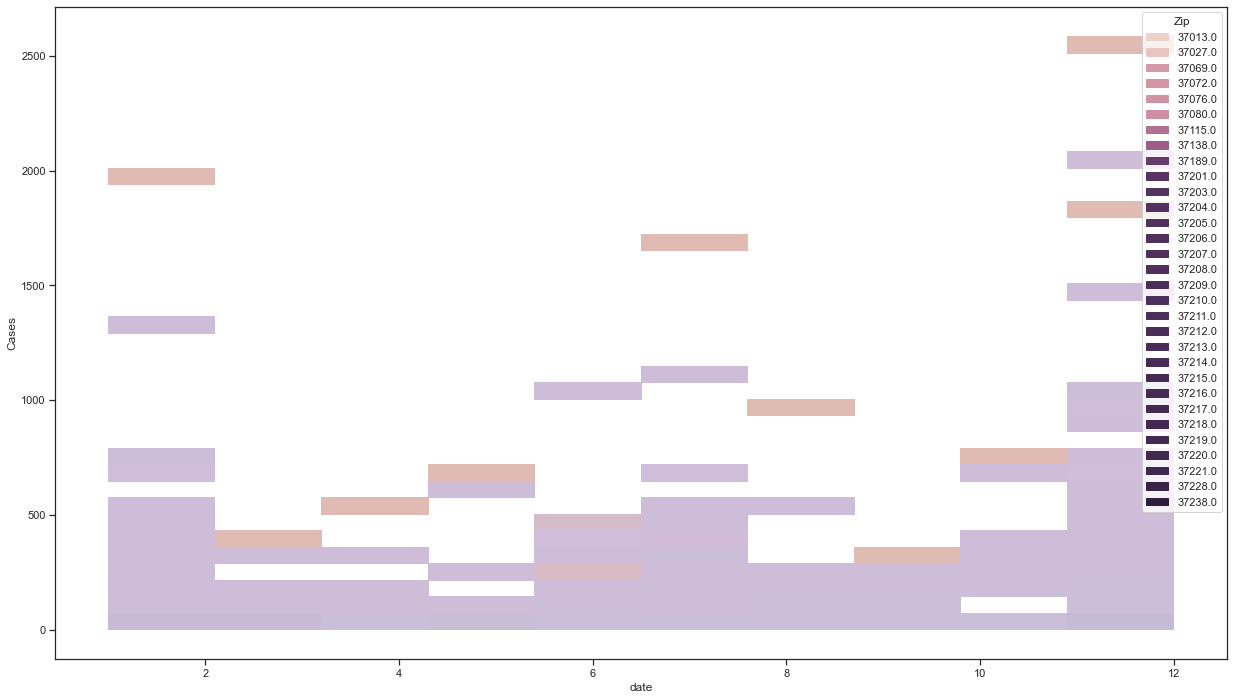

In [22]:
#rs = np.random.RandomState(11)
#x = rs.gamma(2, size=1000)
#y = -.5 * x + rs.normal(size=1000)

#sns.jointplot(data=, x=, y=y, kind="hex", color="#4CB391")

sns.histplot(
    month_data,
    x="date", y="Cases", hue="Zip")

#sns.jointplot(
    #data=case_count_df,
   # x="date", hue="Zip",
   # kind="hex", height=6,
   # multiple="fill", clip=(0, None),
   # palette="ch:rot=-.25,hue=1,light=.75")

In [23]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip = cases_by_zip.reset_index()
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Zip,Cases,ZIP
0,37013.0,13354,37013.0
18,37211.0,10233,37211.0
16,37209.0,5072,37209.0
14,37207.0,4729,37207.0
6,37115.0,4574,37115.0


In [24]:
vaccine_count_df=pd.read_csv('data/vaccine_with_protocol.csv')
vaccine_count_df['date']=pd.to_datetime(vaccine_count_df['vacc_date'])
vac_by_zip=vaccine_count_df.groupby(['zipcode']).sum()
vac_by_zip['ZIP'] = vac_by_zip.index
vac_by_zip = vac_by_zip.reset_index()
vac_by_zip['ZIP'] = vac_by_zip.loc[:, ['ZIP']].astype(float)
vac_zip_ord=vac_by_zip.sort_values(by=['count_given'], ascending=False)
vac_zip_ord.head(5)

,zipcode,count_given,dose_nbr,ZIP
18,37211.0,28477.0,340.0,37211.0
28,37221.0,27622.0,339.0,37221.0
0,37013.0,27167.0,329.0,37013.0
12,37205.0,24451.0,342.0,37205.0
16,37209.0,20553.0,342.0,37209.0


In [25]:
vaccine_count_df.head(5)

,vacc_date,zipcode,count_given,dose_nbr,protocol,date
0,2020-12-12,37215.0,1.0,1.0,two-shot,2020-12-12
1,2020-12-14,37205.0,1.0,2.0,two-shot,2020-12-14
2,2020-12-14,37215.0,1.0,1.0,two-shot,2020-12-14
3,2020-12-15,37221.0,1.0,1.0,two-shot,2020-12-15
4,2020-12-16,37215.0,1.0,1.0,two-shot,2020-12-16


In [26]:
zipcodes = gpd.read_file('../geospatial-python-workshop/data/zipcodes.geojson')
zipcodes['zip'] = zipcodes.loc[:, ['zip']].astype(float)

In [27]:
case_zip_map = pd.merge(left = zipcodes, right = cases_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')

#this "coords" shit is something I found online to get the zip labels to work on the map
case_zip_map['coords'] = case_zip_map['geometry'].apply(lambda x: x.representative_point().coords[:])
case_zip_map['coords'] = [coords[0] for coords in case_zip_map['coords']]

case_zip_map.head()


,zip,objectid,po_name,shape_stlength,shape_starea,geometry,Zip,Cases,ZIP,coords
0,37115.0,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",37115.0,4574,37115.0,"(-86.71324727080966, 36.25527797251701)"
1,37216.0,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",37216.0,2011,37216.0,"(-86.72709601005627, 36.217757551801)"
2,37204.0,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204.0,1786,37204.0,"(-86.77555016772823, 36.105530811982504)"
3,37027.0,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",37027.0,231,37027.0,"(-86.7772443474457, 36.038330449104)"
4,37027.0,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",37027.0,231,37027.0,"(-86.7222583883469, 36.009363232588)"


# labels on those zips now, baby

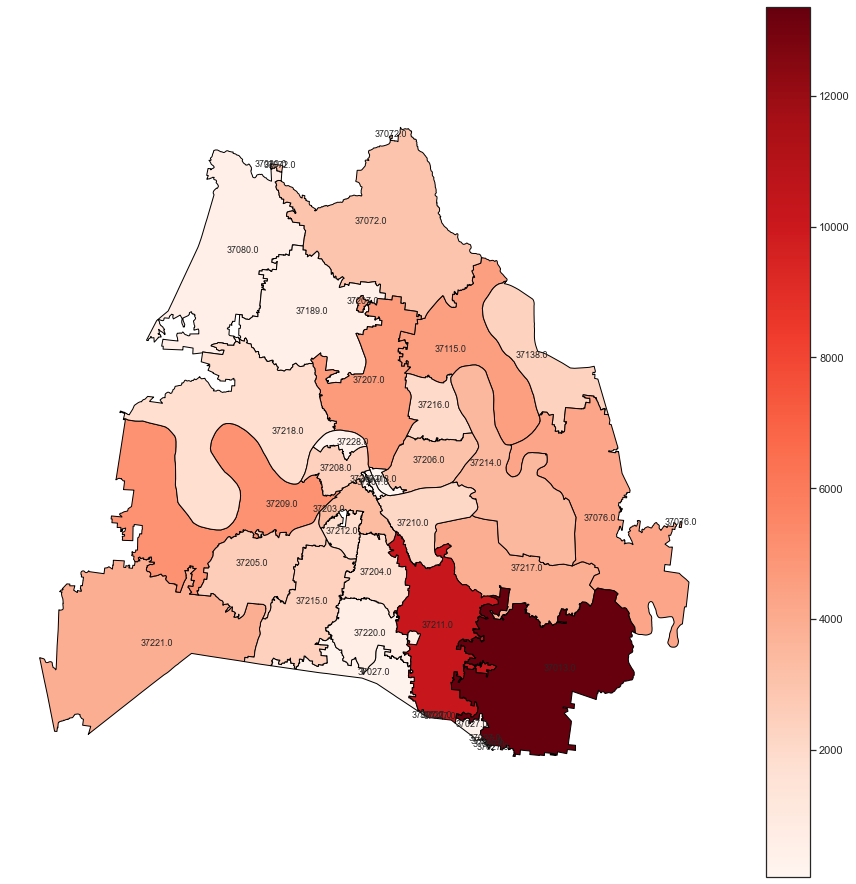

In [28]:
#okay so they don't look very good, but it's a step in the right direction!


fig, ax = plt.subplots(figsize=(16,16))
case_zip_map.plot(column = 'Cases',
                  cmap=plt.cm.get_cmap('Reds'),
                  edgecolor = 'black',
                  legend=True,
                  label=True,
                  ax = ax)
ax.axis('off')

#this is the second part of the above code to get the zip labels to show up
for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['ZIP'], xy=row['coords'],horizontalalignment='center',fontsize=9)

# this next one is a poverty perc coropleth

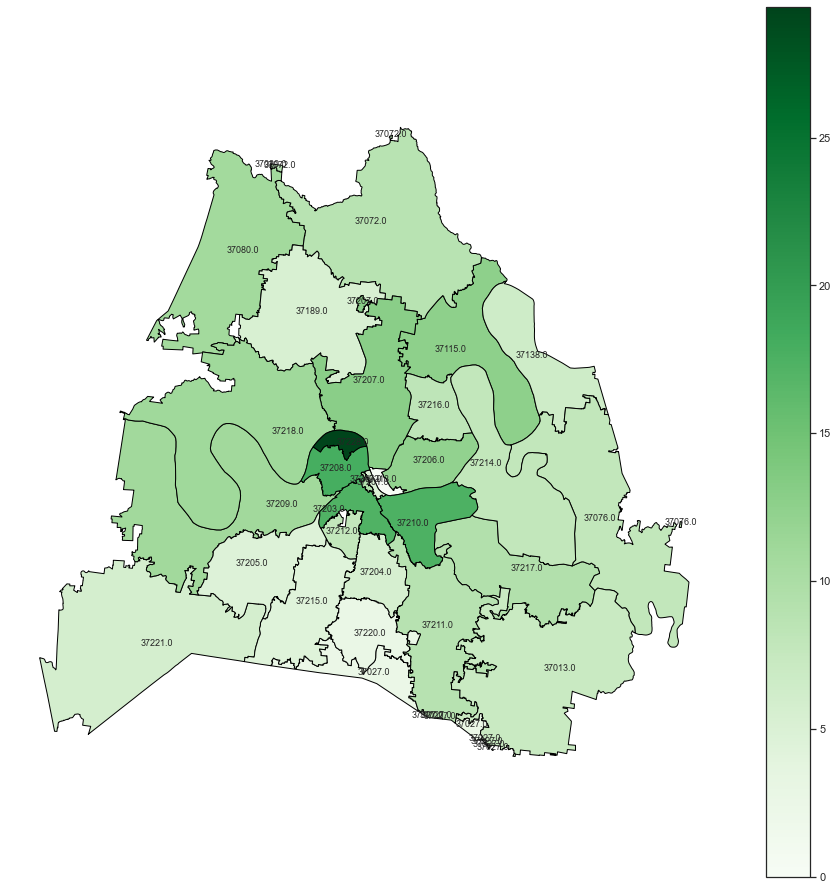

In [29]:
shot_zip_map = pd.merge(left = zipcodes, right = y_pov, 
                    left_on = 'zip', right_on = 'Zip')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'pov_perc',
                  cmap=plt.cm.get_cmap('Greens'),
                  edgecolor = 'black',
                  legend=True,
                  label=True,
                  ax = ax)
ax.axis('off')

for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['ZIP'], xy=row['coords'],horizontalalignment='center',fontsize=9)

# pov pop by zip

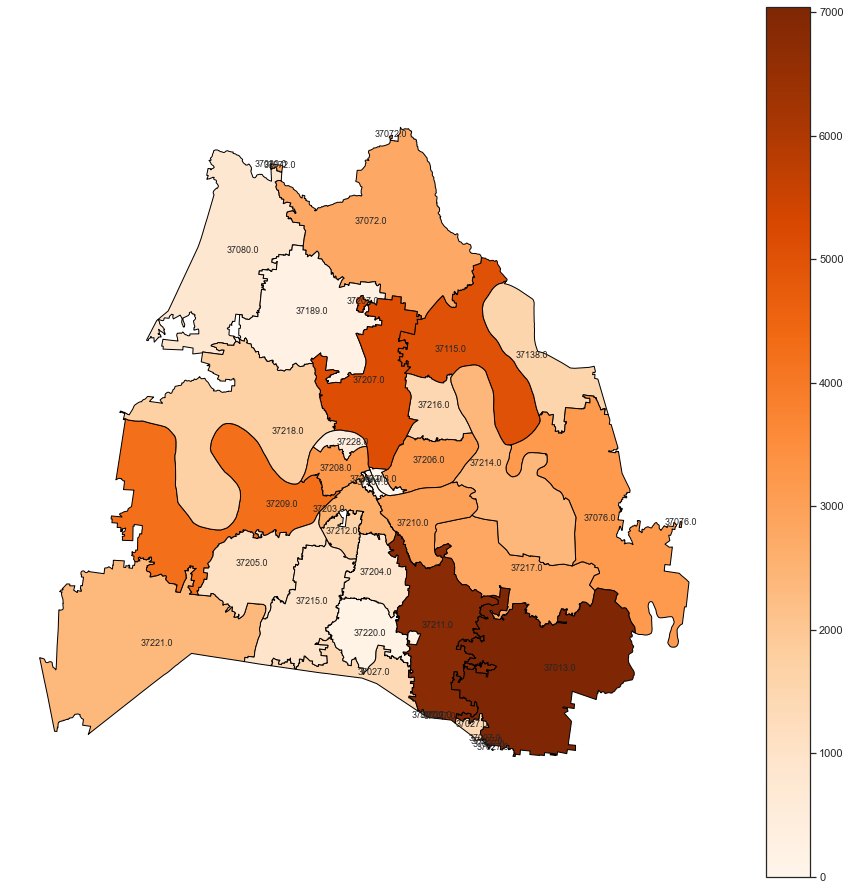

In [30]:
shot_zip_map = pd.merge(left = zipcodes, right = y_pov, 
                    left_on = 'zip', right_on = 'Zip')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'pov_pop',
                  cmap=plt.cm.get_cmap('Oranges'),
                  edgecolor = 'black',
                  legend=True,
                  label=True,
                  ax = ax)
ax.axis('off')

for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['ZIP'], xy=row['coords'],horizontalalignment='center',fontsize=9)

In [31]:
y_pov.head(5)

,Cases,ZIP,pov_pop,pov_perc,Zip
0,13354,37013,7042.0,7.190190,37013.0
1,231,37027,1383.0,2.464494,37027.0
2,16,37069,0.0,0.000000,37069.0
3,2984,37072,2763.0,8.773657,37072.0
4,4279,37076,3171.0,7.895720,37076.0


# this one is vaccines distributed

''

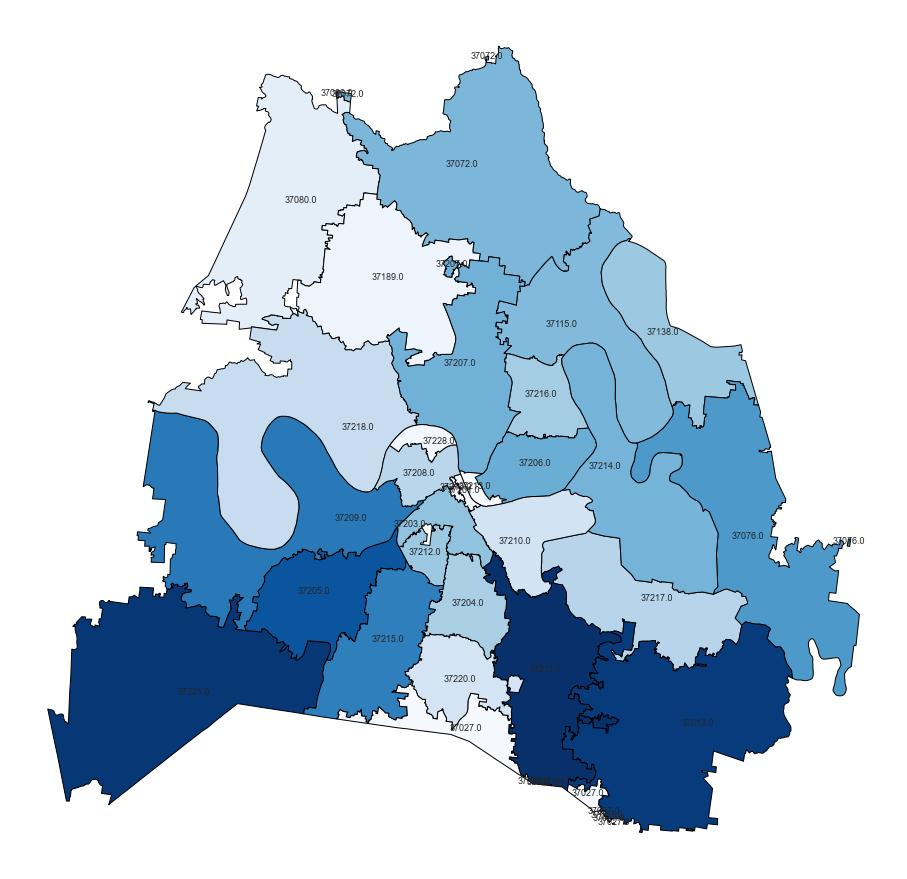

In [32]:
shot_zip_map = pd.merge(left = zipcodes, right = vac_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'count_given',
                  cmap=plt.cm.get_cmap('Blues'),
                  edgecolor = 'black',
                  label=True,
                  ax = ax)
ax.axis('off')

for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['ZIP'], xy=row['coords'],horizontalalignment='center',fontsize=9)
;

# code graveyeard, to chicken to delete it yet

In [33]:
#example code saved for later 
#1. covid_count=covid_count.fillna(0) #this converts all null/NaNs to zero
#2. Convert zip column to int: covid_count['Zip'] = covid_count['Zip'].astype(int)
#covid_count.isnull().sum()


In [34]:
pop_data = pd.read_excel("data/hisp.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
pop_data = pop_data[pop_data.columns.drop(list(pop_data.filter(regex='Error')))]
pop_data.columns = pop_data.columns.droplevel(1)
pop_data = pop_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)
pop_data['zipcode'] = pop_data.loc[:, ['zipcode']].astype(object)

pop_data.head(5)

Unnamed: 0_level_0,zipcode,Total:,Not Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,...,Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,Two races including Some other race,"Two races excluding Some other race, and three or more races"
0,37010,4966,4803,4502,245,2,27,0,0,27,...,163,90,0,0,0,20,0,53,0,53
1,37012,2185,2134,2050,73,0,3,0,0,8,...,51,47,0,0,0,0,0,4,0,4
2,37013,97939,81131,40080,33280,95,4250,0,374,3052,...,16808,13242,446,48,0,0,2464,608,357,251
3,37014,2835,2783,2682,18,0,47,0,0,36,...,52,40,0,0,0,0,0,12,12,0
4,37015,17665,16768,15842,304,147,107,0,5,363,...,897,635,0,2,0,0,221,39,37,2


In [35]:
gend_data = pd.read_excel("data/gender_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
gend_data = gend_data[gend_data.columns.drop(list(gend_data.filter(regex='Error')))]
gend_data.columns = gend_data.columns.droplevel(1)
gend_data = gend_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [36]:
ge_data = pd.read_excel("data/gender_ed.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
ge_data = ge_data[ge_data.columns.drop(list(ge_data.filter(regex='Error')))]
ge_data.columns = ge_data.columns.droplevel(1)
ge_data = ge_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [37]:
income_data = pd.read_excel("data/income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
income_data.columns = income_data.columns.droplevel(1)
income_data = income_data.set_index('Unnamed: 0_level_0').T.reset_index().rename({"index": "zipcode"}, axis = 1)

In [38]:
#x.head(5)

In [39]:
x=cases_by_zip.merge(income_data, left_on='ZIP', right_on='zipcode', how='left', indicator=True)
y=x.merge(pop_data, left_on='ZIP', right_on='zipcode', how='left', indicator='True')
y=y.drop(columns=['Not Hispanic or Latino:',
       'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races',
       'Hispanic or Latino:', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races', 'True', '_merge', 'Zip'])
y.head(5)

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
y_cases=y.sort_values(by=['Cases'], ascending=False)
y_cases.head(5)

In [ ]:
y_cases=y.sort_values(by=['Cases'], ascending=False)
y_cases.head(5)

In [ ]:
y_pop=y.sort_values(by=['Total:_y'], ascending=False)
y_pop.head(5)

In [ ]:
#df['Fruit Total']= df.iloc[:, -4:-1].sum(axis=1)
y['pov_pop']=y.iloc[:,5:10].sum(axis=1)
y['pov_perc']=y['pov_pop']/y['Total:_y']*100
y

In [ ]:
y_pov=y[['Cases','ZIP','pov_pop', 'pov_perc']]
y_pov_ord=y_pov.sort_values(by=['pov_perc'], ascending=False)
y_pov_ord

In [ ]:
#plot style I was curious about getting to work but moved on before success


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()